# Multivariate Gaussian distribution

## One function mode

### Equally spaced data

In [201]:
import numpy as np
d = 100 # dimensionality
x = np.arange(1, d+1, 1) # data equally spaced
mju = np.zeros(d) # mean vector

In [195]:
# TODO: write good comments

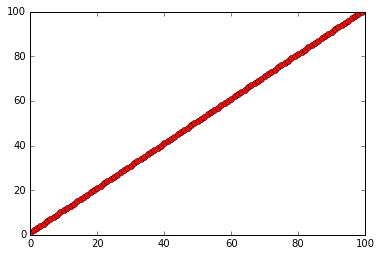

In [158]:
import matplotlib.pyplot as mp
% matplotlib inline
mp.plot(x, 'ro')
mp.show()

In [149]:
def mykernel(x1,x2):
    a = 1
    l = 2
    return a*np.exp(-((x1-x2)**2)/(2*l**2))

In [113]:
def getkernmatrix(x,y):
    k1 = np.size(x)
    k2 = np.size(y)
    matrix = np.zeros((k1,k2))
    for i in range(0,k1):
        for j in range(0,k2):
            matrix[i,j] = mykernel(x[i],y[j])
            
    return matrix

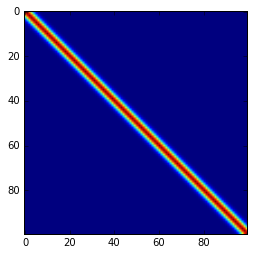

In [202]:
K = getkernmatrix(x,x)

# visualization of kernel matrix
image = mp.imshow(K)
mp.show()

In [171]:
R = np.random.multivariate_normal(mju,K)

In [164]:
print(R)

[-0.25772763  0.01541079  0.35517136  0.42914949  0.06727523 -0.24820623
 -0.3796144  -0.66011207 -1.03216628 -1.26726559 -1.23245794 -0.85545212
 -0.41683947 -0.14725169  0.07875916  0.21893144  0.07891171 -0.30687962
 -0.72962682 -0.9429653  -0.816293   -0.51646138 -0.39821351 -0.59212386
 -0.71202226 -0.45649805 -0.06672808  0.08985889 -0.11358822 -0.47367236
 -0.73026473 -0.91115318 -1.24204502 -1.68093629 -1.82953255 -1.39241163
 -0.55186417  0.33906965  1.14031171  1.49088161  0.92276807 -0.31871581
 -1.44520794 -1.95534246 -1.78929807 -1.13860306 -0.4443955  -0.0228426
  0.21341753  0.46143374  0.65876096  0.43289159 -0.22312399 -0.56238423
 -0.09635694  0.67281306  0.84795928  0.28461458 -0.32667689 -0.50748733
 -0.30139107  0.06138747  0.31896595  0.25590479 -0.11657919 -0.54012152
 -0.84482736 -1.03976885 -0.92744014 -0.28492628  0.47155469  0.70014191
  0.48615394  0.39664405  0.63733334  0.93882946  0.94487291  0.80002721
  0.99587283  1.52679592  1.94224884  1.8105211   0.

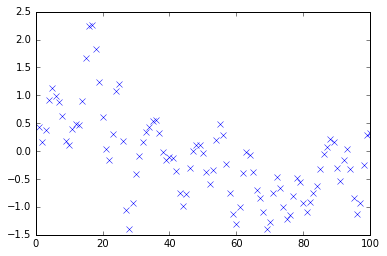

In [172]:
mp.plot(x,R,'bx')
mp.show()

### Not equally spaced data

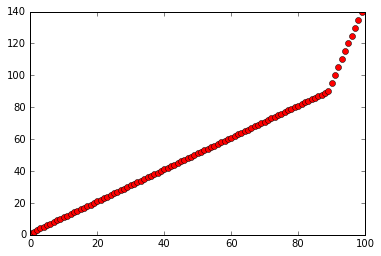

In [203]:
x[90:100] = np.arange(95, 145, 5)
mp.plot(x, 'ro')
mp.show()

In [204]:
print(x)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  95 100 105 110 115 120 125 130 135 140]


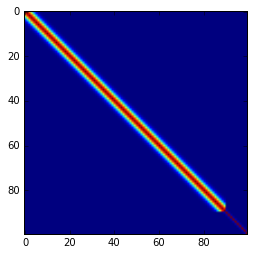

In [252]:
K = getkernmatrix(x,x)

# visualization of kernel matrix
image = mp.imshow(K)
mp.show()

In [341]:
m = 5 # number of realisations
R = np.random.multivariate_normal(mju,K,m)

In [342]:
print(R)

[[ -5.10667996e-01  -4.31588093e-01  -4.33530241e-01  -3.70089464e-01
    9.71200282e-02   6.36655977e-01   7.91524725e-01   6.31848860e-01
    4.38074387e-01   4.12244551e-01   6.51269289e-01   8.60719379e-01
    4.15877846e-01  -7.72064253e-01  -1.89676056e+00  -2.19272853e+00
   -1.87761632e+00  -1.66863342e+00  -1.65604062e+00  -1.35113106e+00
   -5.71565378e-01   2.13176500e-01   4.44366855e-01   3.42268533e-01
    4.79652372e-01   7.47223674e-01   6.97052045e-01   5.07484187e-01
    7.18342958e-01   1.22207278e+00   1.45330981e+00   1.26939719e+00
    9.56944992e-01   8.01867681e-01   8.97697766e-01   1.13672943e+00
    1.20458921e+00   7.50948476e-01  -9.70931373e-02  -8.59531267e-01
   -1.41243937e+00  -1.76465461e+00  -1.64329405e+00  -9.09302260e-01
    4.74983758e-02   5.84983738e-01   6.37160325e-01   5.97985671e-01
    4.66917677e-01   1.89536891e-01  -7.83661861e-02  -2.53487944e-01
   -2.78929805e-01  -3.28695821e-01  -4.67607565e-01  -3.88907359e-01
   -2.59243617e-01  

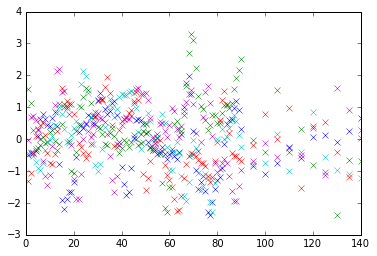

In [343]:
mp.plot((np.ones((m,d)) * x).transpose(), R.transpose(), 'x')
mp.show()

### Conditional distribution (with known parameters)

In [306]:
# conditions:
f_cond = [1, 1]
x_cond = [40, 80]
mju_cond = [0, 0]

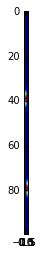

In [254]:
K_x_c = getkernmatrix(x,x_cond)

# visualization of kernel matrix
image = mp.imshow(K_x_c)
mp.show()

In [313]:
from numpy.linalg import inv
invK_c_c = inv(getkernmatrix(x_cond,x_cond))

# A = (f_cond - 0)
# B = K_x_c*invK_c_c
# C = B*A
# mju_cond = mju + C

A = list(np.array(f_cond) - np.array(mju_cond))
B = np.matmul(K_x_c,invK_c_c)
C = np.matmul(B,A)

MU = list(np.array(mju) + np.array(C))
SIGMA = list(np.array(K) - np.array(np.matmul(np.matmul(K_x_c,invK_c_c),K_x_c.transpose())))

In [345]:
m = 10 # number of realisations
RC = np.random.multivariate_normal(MU,SIGMA,m)

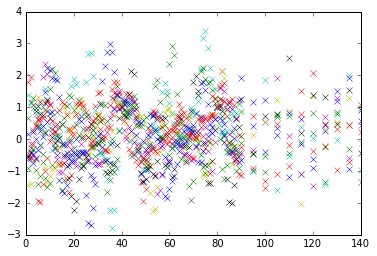

In [348]:
mp.plot((np.ones((m,d)) * x).transpose(), RC.transpose(), 'x')
mp.show()

In [349]:
# TODO: try to use seaborn

In [350]:
# TODO: how to scale plots?